In [7]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

from sklearn.model_selection import KFold
from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from matplotlib import pyplot as plt

In [8]:
base = pd.read_csv('../Data/BaseData.csv')

In [9]:
base.shape

(2580, 299)

In [10]:
base.isnull().sum().sum()

0

In [11]:
base.head(3)

,Unnamed: 0,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,PoolQC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConL

(2064, 2)
(2064,)
(516, 2)
(516,)
HuberRegressor()
R2 Train is: 0.7271538184323436
R2 Test is: 0.7247750285664445
ADJ_R2 is: 0.7245614275020801


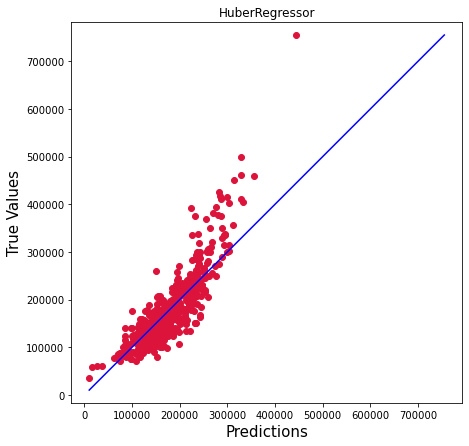


(2064, 2)
(2064,)
(516, 2)
(516,)
HuberRegressor()
R2 Train is: 0.7411940103181367
R2 Test is: 0.6778489169010218
ADJ_R2 is: 0.6775988966580269


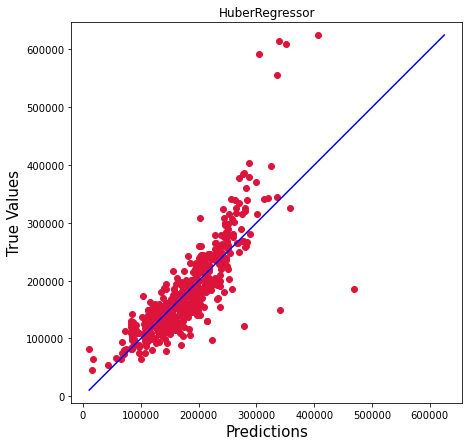


(2064, 2)
(2064,)
(516, 2)
(516,)
HuberRegressor()
R2 Train is: 0.7244412756117762
R2 Test is: 0.7541516319457404
ADJ_R2 is: 0.7539608299526832


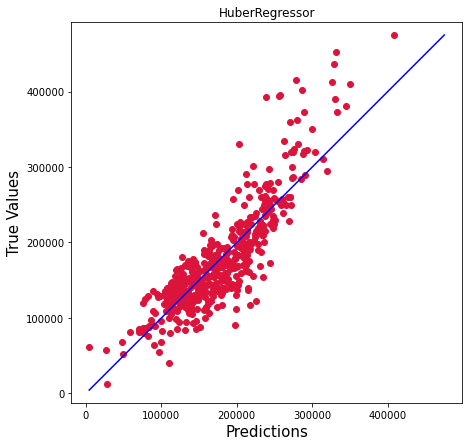


(2064, 2)
(2064,)
(516, 2)
(516,)
HuberRegressor()
R2 Train is: 0.730637330283799
R2 Test is: 0.7115598549049464
ADJ_R2 is: 0.7113359975940461


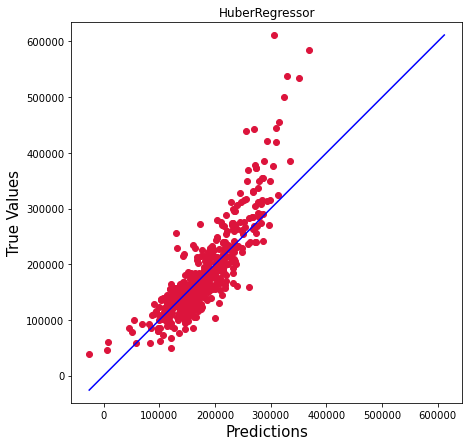


(2064, 2)
(2064,)
(516, 2)
(516,)
HuberRegressor()
R2 Train is: 0.7163840543079658
R2 Test is: 0.7737644573616138
ADJ_R2 is: 0.7735888768085378


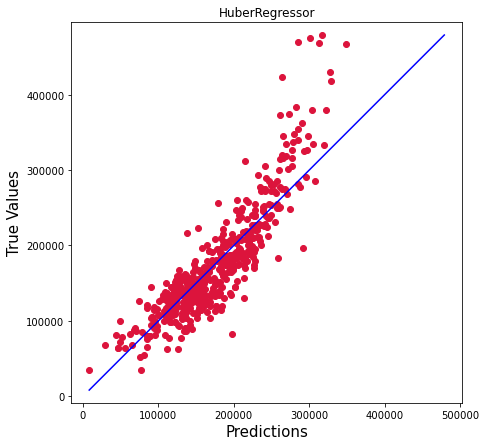

In [13]:
X = base[['GrLivArea','OverallQual']].values
#X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

folds = KFold(n_splits = 5, shuffle = True, random_state = None)

for trainIndex, testIndex in folds.split(X):
    X_train, X_test = X[trainIndex], X[testIndex]
    y_train, y_test = y[trainIndex], y[testIndex]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    #scaler = preprocessing.StandardScaler().fit(X_train)
    #X_train_scaled = scaler.transform(X_train)
    #X_test_scaled = scaler.transform(X_test)
    
    #alphas = 10**np.linspace(10,-2,100)*0.5
    #ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    #ridgecv.fit(X_train_scaled, y_train)
    #print(ridgecv.alpha_)
    
    huber = HuberRegressor()
    print(huber)
    huber.fit(X_train, y_train)
    print('R2 Train is: ' + str(huber.score(X_train, y_train)))
    print('R2 Test is: ' + str(huber.score(X_test, y_test)))
    
    #the below offers same result as above, good back up:
    pred = huber.predict(X_test)
    #print(r2_score(y_test, pred))
    
    ADJ_R2 = 1 - (1-r2_score(y_test, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    print('ADJ_R2 is: ' + str(ADJ_R2))
    
    predicted_value = huber.predict(X_test)
    true_value = y_test
    
    plt.figure(figsize=(7,7))
    plt.scatter(predicted_value, true_value, c='crimson')

    plt.title('HuberRegressor')
    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.show()
    
    print()
    
#    RSS = pd.DataFrame({'Actual': y_test, 'Predicted':pred})
#    #TSS = pd.DataFrame({'Actual': y_test, 'Average y':np.mean(y_test)})
#    print('RSS is: '+ str(np.sum(np.square(RSS['Predicted'] - RSS['Actual']))))
#    print('TSS is: '+ str(np.sum(np.square(np.mean(y_test) - RSS['Actual']))))
#    print()